In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

positionData = np.load("g26perrindata.npy")
rand = np.random.default_rng().random

# Random Walks:
A random walk is the name given to a scenario where an object moves in a random direction, usually by a random distance. There are many scenarios that result in a random walk, and understanding them better gives us a stronger understanding of the world around us. Some examples of a random walk are: Brownian motion, the path a single molecule travels when placed in a fluid, and even something as strange as the energy levels of a molecule allowing it to undergo a chemical reaction or not. Brownian motion is caused because of the large amounts of molecules in a fluid, all bouncing in random directions themselves, these molecules push around our molecule of interest in random directions. Chemical reactions can be modeled with a random walk because the amount of kinetic energy that a molecule has (and all other forms of energy too) can change randomly as the molecule interacts with every other surrounding molecule. These random changes in energy can give the molecule enough energy to undergo a chemical reaction, or even to undo it and return to its previous state. These random interactions and changes in energy can be modeled with the same principles as other random walks.  

Examples of a random walk are shown below.   

In figure 1, a single random walk is shown. The random walk started from the triangle and followed a random path until it reached the x after 1000 steps. The exact path traveled cannot be determined, as only a trace of the path remains, and the random walk doubles back on itself many times.   

Figure 2 shows a viariety of random walks plotted on the same graph showing the wide variety of possibilities a random walk can result in. Each Walk started from the triangle and ended at their respective x mark.

Text(0, 0.5, 'Y Position')

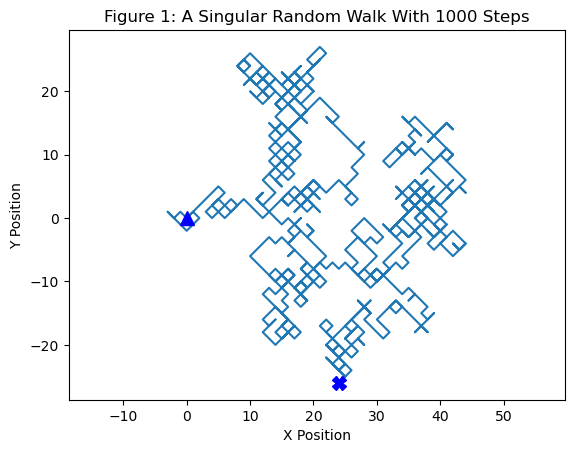

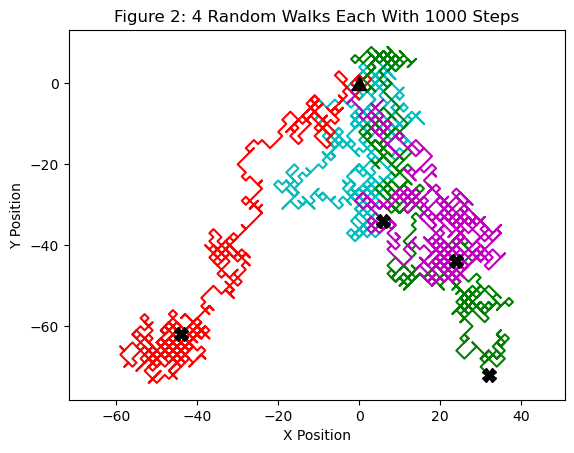

In [2]:
#steps_xy & Random Walk Examples
def steps_xy(numSteps): #steps_xy produces a random walk, and returns 2 arrays storing the position after every step taken in the x and y directions
    xPos = np.zeros(numSteps + 1)
    yPos = np.zeros(numSteps + 1)
    xStep = 2*(rand(numSteps) < 0.5) - 1 #Creates a number of random steps equal to the vaule of numSteps each being either +1 or -1
    yStep = 2*(rand(numSteps) < 0.5) - 1 #same as xStep
    xPos[1:] = np.cumsum(xStep) # calculates the current position of the particle based on the steps taken in the X direction
    yPos[1:] = np.cumsum(yStep) #Same as xPos but for the Y direction instead
    return xPos, yPos

numSteps = 1000

#Generates Figure 1, a Singular Random Walk
x, y = steps_xy(numSteps)
plt.figure(1)
plt.plot(x, y), plt.plot(x[-1], y[-1], marker = 'X', color = 'b', ms = 10), plt.plot(0, 0, marker = '^', color = 'b', ms = 10) # Plots the trajectory of the random walk, along with an x at the final position, and a triangle at the starting position
plt.axis('equal')
plt.title('Figure 1: A Singular Random Walk With 1000 Steps')
plt.xlabel('X Position')
plt.ylabel('Y Position')

#Generates Figure 2, Multiple Random Walks
# Generate 4 random walks with the steps_xy function defined earlier
x1, y1 = steps_xy(numSteps)
x2, y2 = steps_xy(numSteps)
x3, y3 = steps_xy(numSteps)
x4, y4 = steps_xy(numSteps)

# Plot the 4 random walks on the same graph
plt.figure(2)
plt.plot(x1, y1, color = 'c')
plt.plot(x2, y2, color = 'r')
plt.plot(x3, y3, color = 'g')
plt.plot(x4, y4, color = 'm')

# Marking the end points of each random walk with Xs and the starting point with a triangle
plt.plot(x1[-1], y1[-1], marker = 'X', color = 'black', ms = 10), plt.plot(x2[-1], y2[-1], marker = 'X', color = 'black', ms = 10)
plt.plot(x3[-1], y3[-1], marker = 'X', color = 'black', ms = 10), plt.plot(x4[-1], y4[-1], marker = 'X', color = 'black', ms = 10)
plt.plot(0, 0, marker = '^', color = 'black', ms = 10)
plt.axis('equal')
plt.title('Figure 2: 4 Random Walks Each With 1000 Steps')
plt.xlabel('X Position')
plt.ylabel('Y Position')

There are many patterns inherent to a random walk, however, most of them cannot be noticed with the small numbers of random walks shown thus far. In order to truly see any patterns a random walk creates, it is necessary to compute and analize much higher numbers of random walks. One example of patterns that show up can be found in the final position of the particle after the random walk has concluded. After enough trials of a random walk it becomes evident that random walks ending close to the origin are more likely than random walks that end further away from the origin. Figure 3 below is a good visual to demonstrate that. It shows the endpoints of 1000 different random walks, and you can see there are more close to the origin and less the further you get away from it, though to what extent the increase towards the origin gets expressed is impossible to tell with a graph such as shown in Figure 3.

Text(0, 0.5, 'Y position ($\\mu m$)')

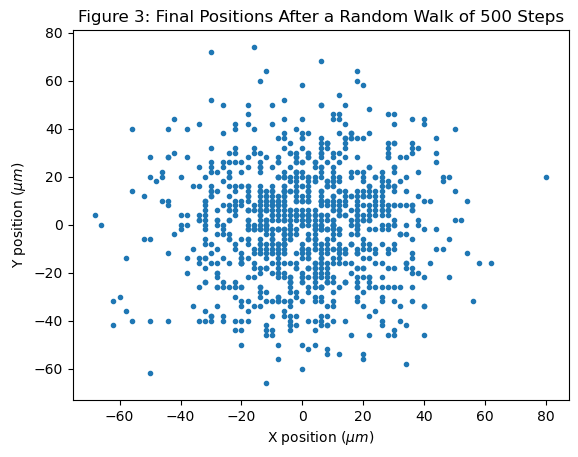

In [3]:
# walk_xy and figure 3, scatter plot
def walk_xy(numSteps):
    position = np.array([0,0]) # an array to store the final x and y position only
    xStep = 2*(rand(numSteps) < 0.5) - 1 #Creates a number of random steps equal to the vaule of numSteps each being either +1 or -1
    yStep = 2*(rand(numSteps) < 0.5) - 1 #same as xStep
    position[0] = xStep.sum() #sums all the xSteps and sets the x position equal to that sum
    position[1] = yStep.sum() #sums all the ySteps and sets the y position equal to that sum
    return position

numSteps = 500 # The number of steps each random walk will take
numWalks = 1000 # The number of random walks that will be generated

storeX = np.zeros(numWalks) #An array to store the the final x values of many random walks
storeY = np.zeros(numWalks) #An array to store the final y values of many random walks

disp = np.zeros(numWalks)
meanSquareDisp = np.zeros(numWalks)

for i in range(numWalks):
    finalPos = walk_xy(numSteps)
    storeX[i] = finalPos[0] #All the x values of numWalks number of random walks
    storeY[i] = finalPos[1] #All the y values of numWalks number of random walks
    disp[i] = np.sqrt(finalPos[0]**2 + finalPos[1]**2) #The true displacement away from the origin at the end of a random walk
meanSquareDisp = disp**2 #The length-suare displacement at the end of the random walks

# A: Make a scatter plot of the end points
plt.figure(3)
plt.plot(storeX, storeY, linestyle='none', marker = '.')
plt.title("Figure 3: Final Positions After a Random Walk of 500 Steps")
plt.xlabel("X position ($\mu m$)")
plt.ylabel("Y position ($\mu m$)")

A scatter plot can give us a lot of insight into what all these random walks look like, but they lack many things in terms of quantifying the degree to which random walks are more likely to end near the origin. To get a better idea of the spread we can create a scatter plot displaing the frequency that a random walk ends a certain distance away from the origin.

Text(0, 0.5, 'Frequency')

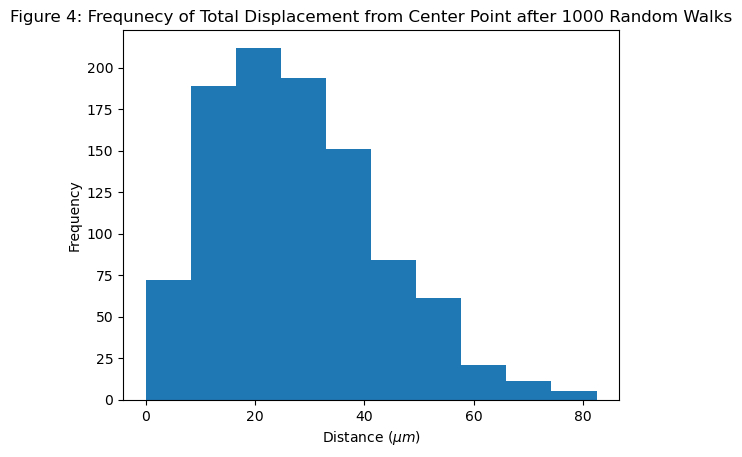

In [4]:
#Histogram Displacement Random Walks
plt.figure(4)
plt.hist(disp)
plt.title("Figure 4: Frequnecy of Total Displacement from Center Point after 1000 Random Walks")
plt.xlabel("Distance ($\mu m$)")
plt.ylabel("Frequency")

Through this graph we can now see that there is a spike around 10-30 micrometers from the origin, with the amount of random walks ending closer or further away from that point being less likely. However, determining any form of relationship from a graph with that shape is hard as it doesn't follow a standard function formula. But there is a way we can manipulate the data to extract a useful relationship. By looking at the length-Square Distance (which is found either by squaring the distance, or by calculating $\Delta x^2 + \Delta y^2$. It is through this relationship that we compare the theoretical random walks generated by a program with real world data collected from a particle floating in water.  

## Brownian Motion Analysis
Browinan Motion is the name given to the behavior of motion of particles when they are suspended in water, or other fluids, caused by the massive amount of collisions between the particle and the surrounding fluid molecules. The dataset "g26perrindata" is provided which records the displacement of a particle in water every 30 seconds. Because the time frame between each data-point is so large, each point can be considered to be the final displacement after 30 seconds of random-walks instead of the displacement between points of one single random walk. This allows us to analyze it like it's a colletion of 500 random walks each lasting 30 seconds.  

We make a comparison to the dataset with the random walk generated through code, and find that the most useful one for analysis is the comparison of the length-square distance. Figure 5 shows the length-square distance for the dataset collected from real world data, and Figure 6 shows the length-square distance for the generated random walks.

The range of values for the length-squared displacement is (1.2320099999999998e-29, 312.9451718552014)


Text(0, 0.5, 'Frequency')

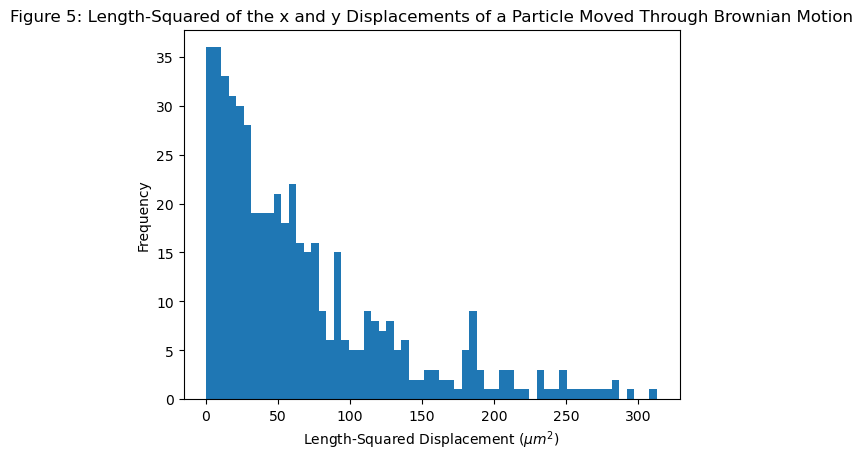

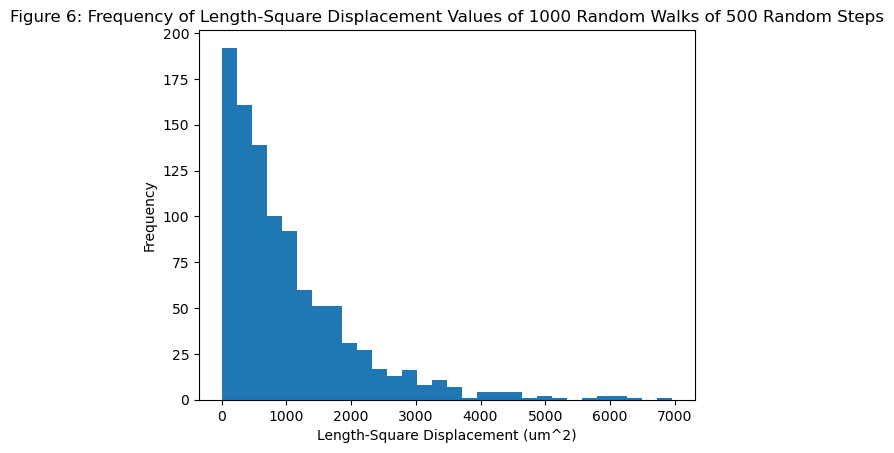

In [5]:
# g26 Dataset Comparison
# Finding the Length-Squared of the displacements
dataSize = len(positionData)
lengthSquared = np.zeros(dataSize)
lengthSquared = (positionData[:, 0]**2) + (positionData[:, 1]**2)

# Determining the range of values
print("The range of values for the length-squared displacement is (" + str(min(lengthSquared)) + ", " + str(max(lengthSquared)) + ")")

# Plotting Histogram
plt.figure(5)
plt.hist(lengthSquared, bins = 60)
plt.title("Figure 5: Length-Squared of the x and y Displacements of a Particle Moved Through Brownian Motion")
plt.xlabel("Length-Squared Displacement ($\mu m^2$)")
plt.ylabel("Frequency")

numTrials = 1000 # The number of random walks that will be generated for the comparison
squareDisp = np.zeros(numTrials) #squareDisp is what will store the Length-Square Displacement Values

for i in range(0, numTrials):
    finalPosition = walk_xy(numSteps) #records the final position of each random walk
    squareDisp[i] = finalPosition[0]**2 + finalPosition[1]**2 #Calculates the length-Square Displacement from the final position of the random walk

plt.figure(6)
plt.hist(squareDisp, bins = 30)
plt.title("Figure 6: Frequency of Length-Square Displacement Values of 1000 Random Walks of 500 Random Steps")
plt.xlabel("Length-Square Displacement (um^2)")
plt.ylabel("Frequency")

As you can see in the 2 graphs, they both share a very similar shape. They, of course, are not equivalent, and if you spend a bunch of time you can gather a bunch of differences between the two, however they both show the same pattern of a very steam spike on the left, that plateaus as the length-square displacement increases. Looking at the two of them you might assume that there is some form of exponential relationship going on with this histogram. Unfortunately, on a standard scale you cannot assume that just because a graph is curved it's exponential. In order to determine that we need to plot the histogram on a semi-log chart, if it's linear there, then it has an exponential relationship. Figures 7 and 8 show those semi-log charts

Text(0, 0.5, 'Frequency')

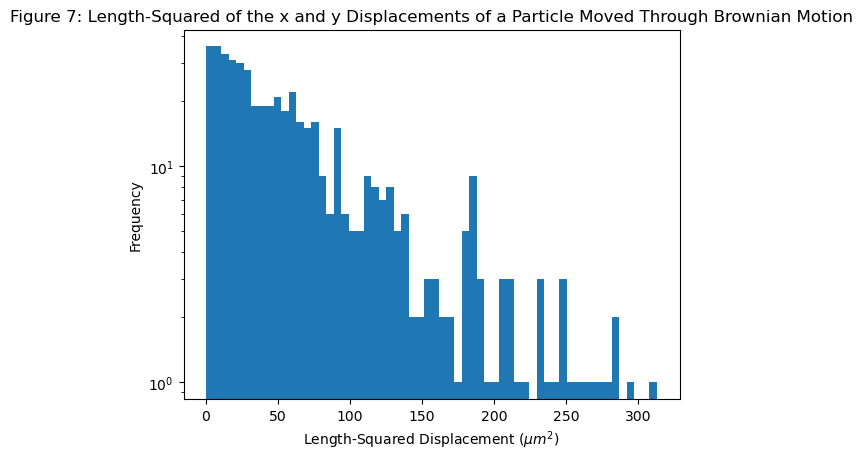

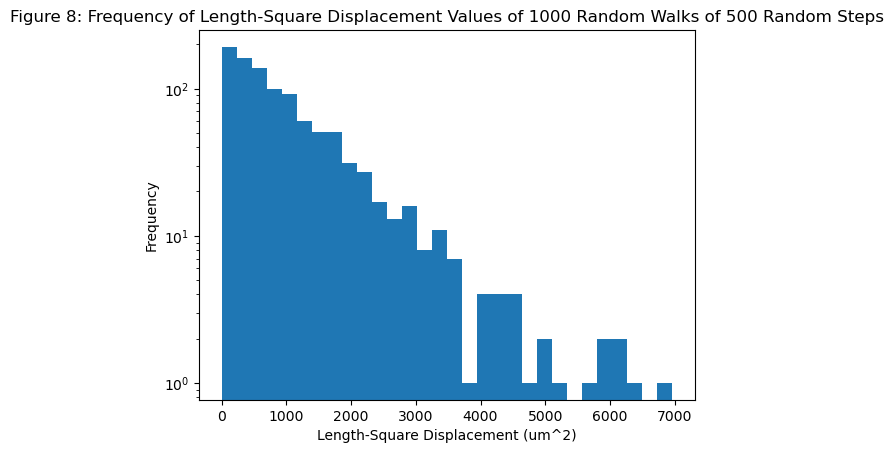

In [6]:
#Semi-log Histogram
plt.figure(7)
plt.hist(lengthSquared, bins = 60, log = True)
plt.title("Figure 7: Length-Squared of the x and y Displacements of a Particle Moved Through Brownian Motion")
plt.xlabel("Length-Squared Displacement ($\mu m^2$)")
plt.ylabel("Frequency")

plt.figure(8)
plt.hist(squareDisp, bins = 30, log = True)
plt.title("Figure 8: Frequency of Length-Square Displacement Values of 1000 Random Walks of 500 Random Steps")
plt.xlabel("Length-Square Displacement (um^2)")
plt.ylabel("Frequency")

Looking at these graphs it easier to convince yourself that you're looking at something that could potentially be an exponential relationship, but it's not sure fire yet. It is possible that with even more trials, even more random walks, that we could get enough data to smooth out the theoretical line and determine if it is truly an exponential relationship, however there will always be the divide between the unlimited amount of data we can generate based on our model, and the limited data we have from the real world.  

There is one final interesting aspect of the length-square displacement we can analyze, and that is the mean-square displacement, or the mean of the length-squar displacement. The average of the length-square displacement increases as the number of steps taken in a random walk increases. For instance, one of the random walk batches I generated with 500 steps per walk had a mean-square displacement of 1967 $\mu m^2$, whereas one I generated with 4000 steps per walk had a mean of 7847 $\mu m^2$. Curious on the exact behavior of this increase I calculated the mean-square displacement from a range of 500 to 10,000 steps and saw a largely linear relationship between the number of steps in a walk, and the value of the mean-square displacement. This linear relationship is shown in figure 9.

8305.928


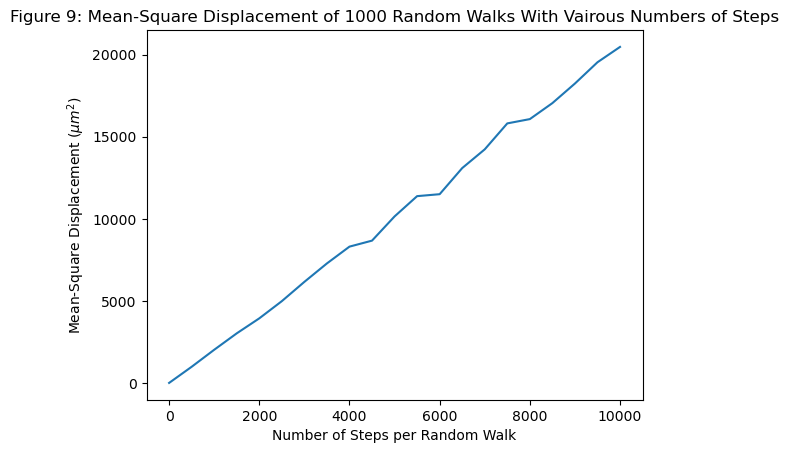

In [7]:
# Mean-Square Displacement Relationship
numWalks = 1000 #The number of walks the average was taken between
maxSteps = 10000 #The maximum number of steps tested

meanSquareDisp = np.zeros(maxSteps//500 + 1) #Arrays for storing the mean-square displacement and the number of steps taken
stepCounter = np.zeros(maxSteps//500 + 1)

for numSteps in range(500, maxSteps+1, 500): #This loop runs through calculating the mean-square displacement at many different step counts per random walk
    disp = np.zeros(numWalks)
    for j in range(numWalks):
        finalPos = walk_xy(numSteps)
        squareDisp[j] = finalPos[0]**2 + finalPos[1]**2
    meanSquareDisp[numSteps//500] = np.mean(squareDisp)
    stepCounter[numSteps//500] = numSteps

plt.figure(9)
plt.plot(stepCounter, meanSquareDisp)
plt.title('Figure 9: Mean-Square Displacement of 1000 Random Walks With Vairous Numbers of Steps')
plt.xlabel('Number of Steps per Random Walk')
plt.ylabel('Mean-Square Displacement ($\mu m^2$)')
print(meanSquareDisp[4000//500])

## Summary
In conclusion, random walks are very interesting systems with many different possibilies they can result in. Sometimes a walk will end up right where it started, and sometimes it'll end up far away. The exact path that a random walk will take is completely unpredictable, but there is a lot you can predict about a system regardless of the chaos. Average displacements can remain pretty steady (when compared against other walks of similar step counts or time intervals). Though not explored in this report, a random walk can even be influenced by adjusting the weight of the random direction selection. If the fluid has flow that can provide a force increasing the odds you travel in one direction over the other. Random walks help control biological motors on a cellular level allowing multi-cellular life to flourish, and they dominate the behavior of fluids on a microscopic scale. These important, diverse, and complex systems can be broken down and understood much better through simple models like a coin-flip based random walk, and models like these allow us to pull a tremendous amount of knowledge out of systems that we would otherwise be incapable of understanding.